<a href="https://colab.research.google.com/github/johnnyff/bigcontest2021/blob/main/bigcontest_eco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

import datetime
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

sns.set(font ='NanumGothic')

In [2]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list


['cmmi10',
 'STIXGeneral',
 'cmsy10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'cmr10',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'cmex10',
 'STIXSizeThreeSym',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'cmss10',
 'cmtt10',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Serif',
 'cmb10',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'NanumGothic',
 'NanumSquareRound',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'NanumMyeongjo',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans',
 'NanumMyeongjo',
 'Humor Sans',
 'NanumGothic',
 'Liberation Sans',
 'Liberation Mono',
 'NanumSquareRound',
 'Liberation Sans Narr

In [4]:
root = '/content/drive/MyDrive/bigcontest/jeju_data/train_data'

In [5]:
waste = pd.read_csv(root+'/01_음식물쓰레기_FOOD_WASTE_210811_update.CSV', encoding='cp949')
kor_popl = pd.read_csv(root+'/02-1_내국인유동인구_KOREAN.CSV', encoding='cp949')
for_popl_l = pd.read_csv(root+'/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV', encoding='cp949')
for_popl_s = pd.read_csv(root+'/02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV', encoding='cp949')
jej_popl = pd.read_csv(root+'/03_거주인구_RESIDENT_POP.CSV', encoding='cp949')
card = pd.read_csv(root+'/04_음식관련 카드소비_CARD_SPENDING.CSV', encoding='cp949')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


In [7]:
# emd_cd 공백제거
waste['emd_cd']= waste['emd_cd'].apply(lambda x: str(x).strip())
len(waste['emd_cd'].unique())
# em_are_cd 카테고리화
waste['em_area_cd'] = waste['em_area_cd'].astype("category").cat.codes
waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,51,2,15500,464
1,2018-01-01,제주시,50110630,아라동,1227,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,1226,8,25350,758
3,2018-01-01,제주시,50110630,아라동,1225,12,30000,898
4,2018-01-01,제주시,50110630,아라동,1224,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,1649,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,1652,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,1653,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,1638,5,22050,661


In [11]:
# emd_nm(행정동명) 과 em_area_cd(배출거점지역 코드) 간의 종속관계 확인
for i in range(len(waste['emd_nm'].unique())):
  area = waste['emd_nm'].unique()[i]
  base = waste[waste['emd_nm']==area]['em_area_cd'].unique()
  for j in range(i+1,len(waste['emd_nm'].unique())):
    area2 = waste['emd_nm'].unique()[j]
    compare = waste[waste['emd_nm'] == area2]['em_area_cd'].unique()
    if (len(base)+len(compare)) != len(np.concatenate((base,compare))):
      print(area, area2)

# 배출거점지역 코드는 행정동명에 종속됨

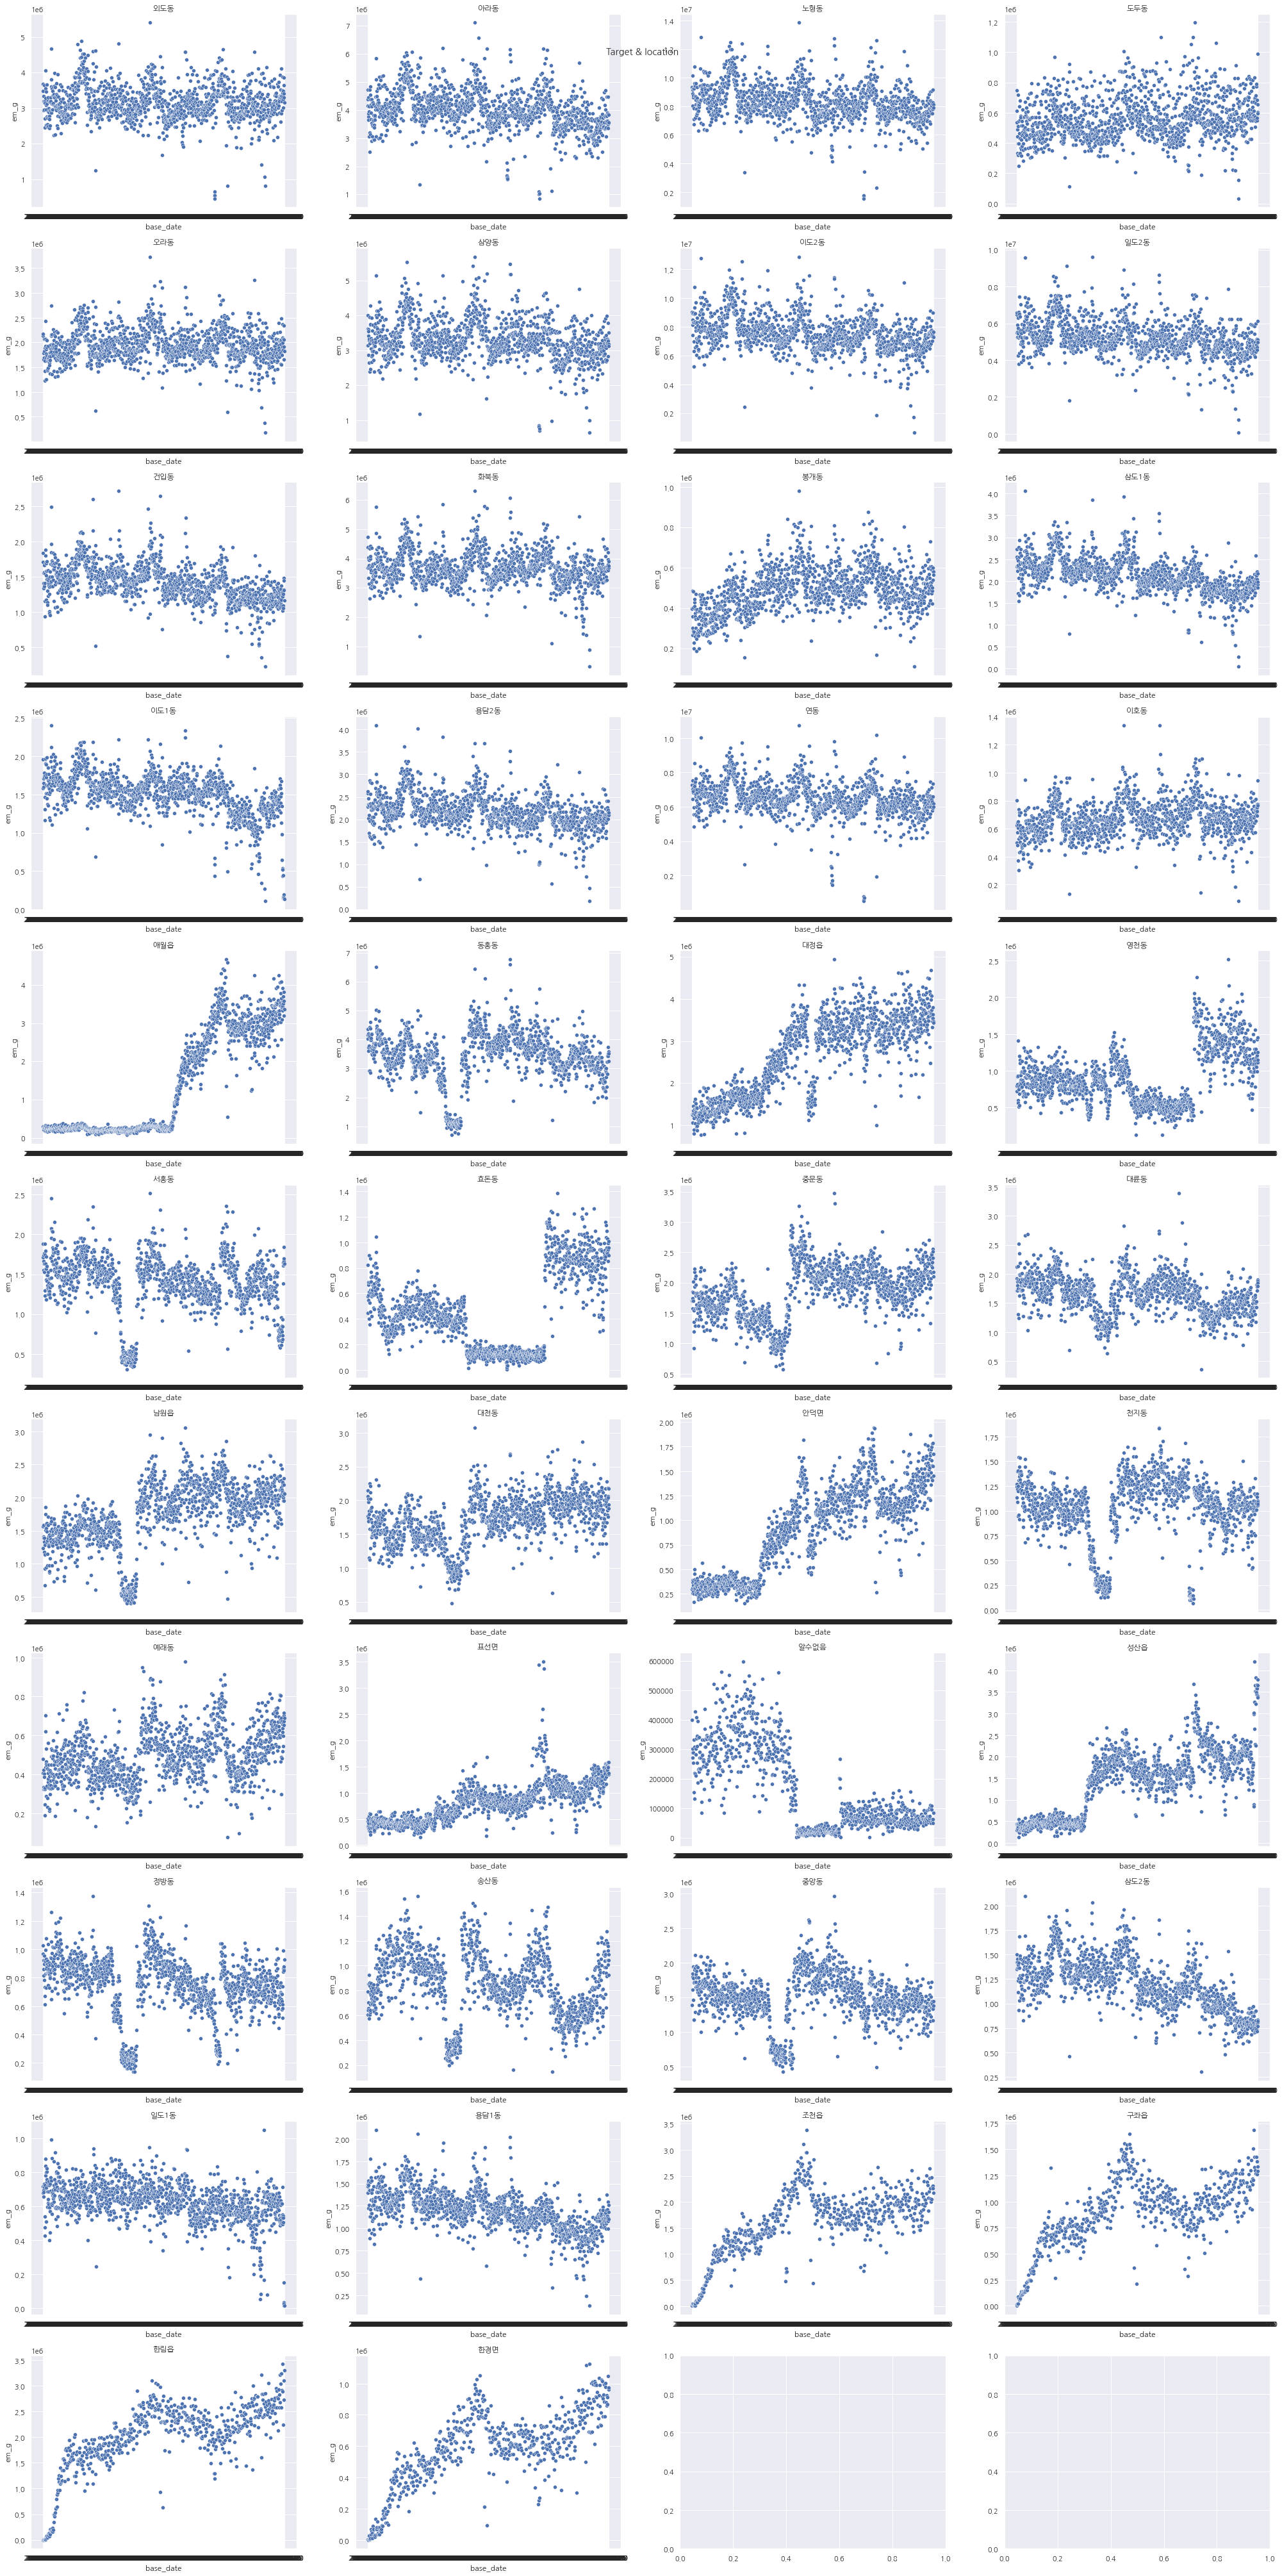

In [18]:
fig, ax = plt.subplots(11,4, figsize=(28,56))
ax = ax.flatten()

fig.suptitle("Target & location")

for i, column in enumerate(waste['emd_nm'].unique()):
  a = waste[waste['emd_nm']==column].groupby('base_date')['em_g'].sum()
  sns.scatterplot(x= a.index, y= a, ax = ax[i])
  ax[i].set(title = column)
plt.tight_layout()

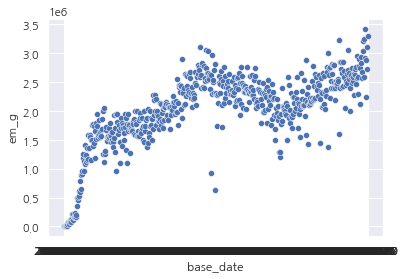

In [15]:
waste[waste['emd_nm']=='한림읍'].groupby('base_date')['em_g'].sum().index


Index(['2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
       '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
       ...
       '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
       '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30'],
      dtype='object', name='base_date', length=599)